<a href="https://colab.research.google.com/github/memmusty/3AInstitute/blob/master/ID3_Decision_Tree_Classifier_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was created as my homework for the build course at the 3AInstitute.

My work begins from the Data Validation section. The codes for downloading and ingesting the data, and the guides was provided by the staff.

#Training Data

I will perform data analysis on 'zoo dataset' and use it in building the ID3 model.

[Zoo dataset](http://archive.ics.uci.edu/ml/datasets/Zoo?ref=datanews.io) -- As described in the dataset information sheet:

“A simple database containing 17 Boolean-valued attributes. The "type" attribute appears to be the class attribute.” The datasheet will quickly reveal that the dataset itself has some problematic categories. We are primarily using it in order to have access to multiple datasets with binary-valued attributes.


In [ ]:
# First, we'll download the zoo dataset to a local (temporary) folder
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

--2020-09-03 11:27:00--  http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4126 (4.0K) [application/x-httpd-php]
Saving to: ‘zoo.data’

zoo.data            100%[===================>]   4.03K  --.-KB/s    in 0s      

2020-09-03 11:27:00 (357 MB/s) - ‘zoo.data’ saved [4126/4126]



In [ ]:
# We can also download and display the dataset's description:
# This command downloads the relevant file
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.names
# This command displays the file's contents
!cat zoo.names

--2020-09-03 11:27:05--  http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2587 (2.5K) [application/x-httpd-php]
Saving to: ‘zoo.names’

zoo.names           100%[===================>]   2.53K  --.-KB/s    in 0s      

2020-09-03 11:27:05 (363 MB/s) - ‘zoo.names’ saved [2587/2587]

1. Title: Zoo database

2. Source Information
   -- Creator: Richard Forsyth
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990
 
3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- A simple database containing 17 Boolean-valued attributes.  The "type"
      attribute appears to be the c

## Data Ingestion

Here we'll "ingest" the data by importing it into [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html):

In [ ]:
from IPython.display import display
import pandas as pd

# Because the data file doesn't have header names, we'll list them here
# You can find a description of the data file at http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.names
feature_names = ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

# Import the "zoo" dataset
zoo = pd.read_csv('zoo.data', names = feature_names)

# Lets take a peek at the data
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# To make all the rows and columns visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data validation

Now's a good chance to have a look at your data and make sure it "checks out". Try plotting several aspects of the data, following the exploratory data analysis steps we've looked at in build, to check for trends and inconsistencies in the data. This is also a good opportunity to begin familiarizing yourself with Panda's capabilities, or revising Tableau or Excel. We've included a 'correlation matrix' to help you get started.

In [ ]:
#Printing the number of rows and columns to see the dimension of the dataset
zoo.shape

(101, 18)

In [ ]:
#Even though it is stated in the UCI Zoo dataset documentation that there are no missing data, and each column have the right data type
#I need to verify that

zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
#explore the distribution of the data and check for outlier values
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


Comment: From the exploration, it is observed that the dataset is complete, clean and tidy with no outliers

In [ ]:
# We'll now import a few useful packages

# Numpy is a linear algebra library, 
# useful for common math operations
import numpy as np 
# Matplotlib is a common plotting library
import matplotlib.pyplot as plt
# Seaborn is handy for creating beautiful plots
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


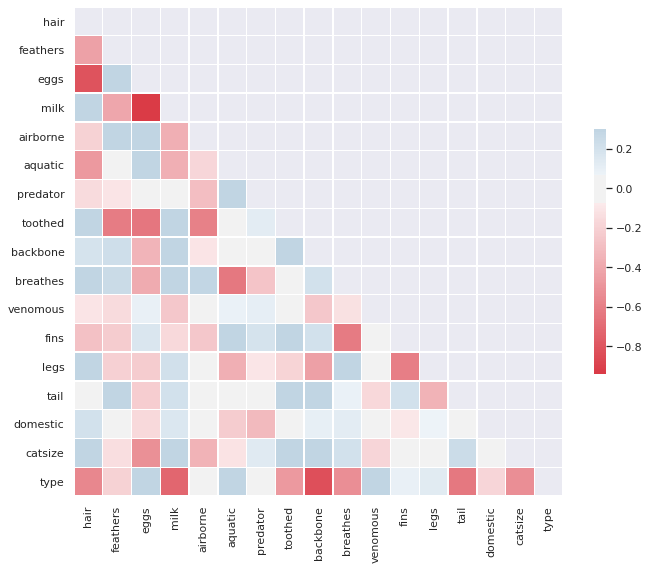

In [ ]:
 %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = zoo.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, as_cmap=True, sep=20, n=11)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The heatmap was generated to explore the relationships of the variables, and I am most interested in the Type variable.
However, the relationship between the type variable and other variables is not reflected on the heatmap so I explored the dataset manually to understand the relationship.

I began with extracting the entries of Type1 animals, I then explored the values of the type1 animals attributes to see if the type is highly dependent on a particular feature

In [ ]:
#Extract the values of the zoo dataset where the Type of the animal is 1, leaving out the entries of other animal types
t1 = zoo.loc[zoo['type'] == 1 ]
t1.info
#displaying the values of each columns and the counts of the values of Type 1 animals
t1.apply(pd.value_counts)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,NaN,2.0,41.0,40.0,NaN,39.0,35.0,19.0,1.0,NaN,NaN,41.0,37.0,3.0,6.0,33.0,9.0,NaN
1,NaN,39.0,NaN,1.0,41.0,2.0,6.0,22.0,40.0,41.0,41.0,NaN,4.0,NaN,35.0,8.0,32.0,41.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN
aardvark,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
antelope,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bear,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boar,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buffalo,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calf,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the table generated above, it can be observed that there are 41 instances of Type 1 animals and animals who produce milk are 41 too.
Does this mean every animal that produces milk is a type 1 animal?

In [ ]:
#To verify this, 
#I print the number of animals that produce milk and the number of animals that doesn't to know if there are milk producing animals in other animal types
zoo['milk'].value_counts()

0    60
1    41
Name: milk, dtype: int64

Only 41 animals produces milk, and they all belong to Type 1 animal. Remember that, Type 1 animals are 41 in the dataset. 
This means all type 1 animals produce milk. Milk is a key feature of Type 1 animals

I performed this iteratively on the other types (I deleted the cells so the notebook won't be messi) and my observations are shown in the image below.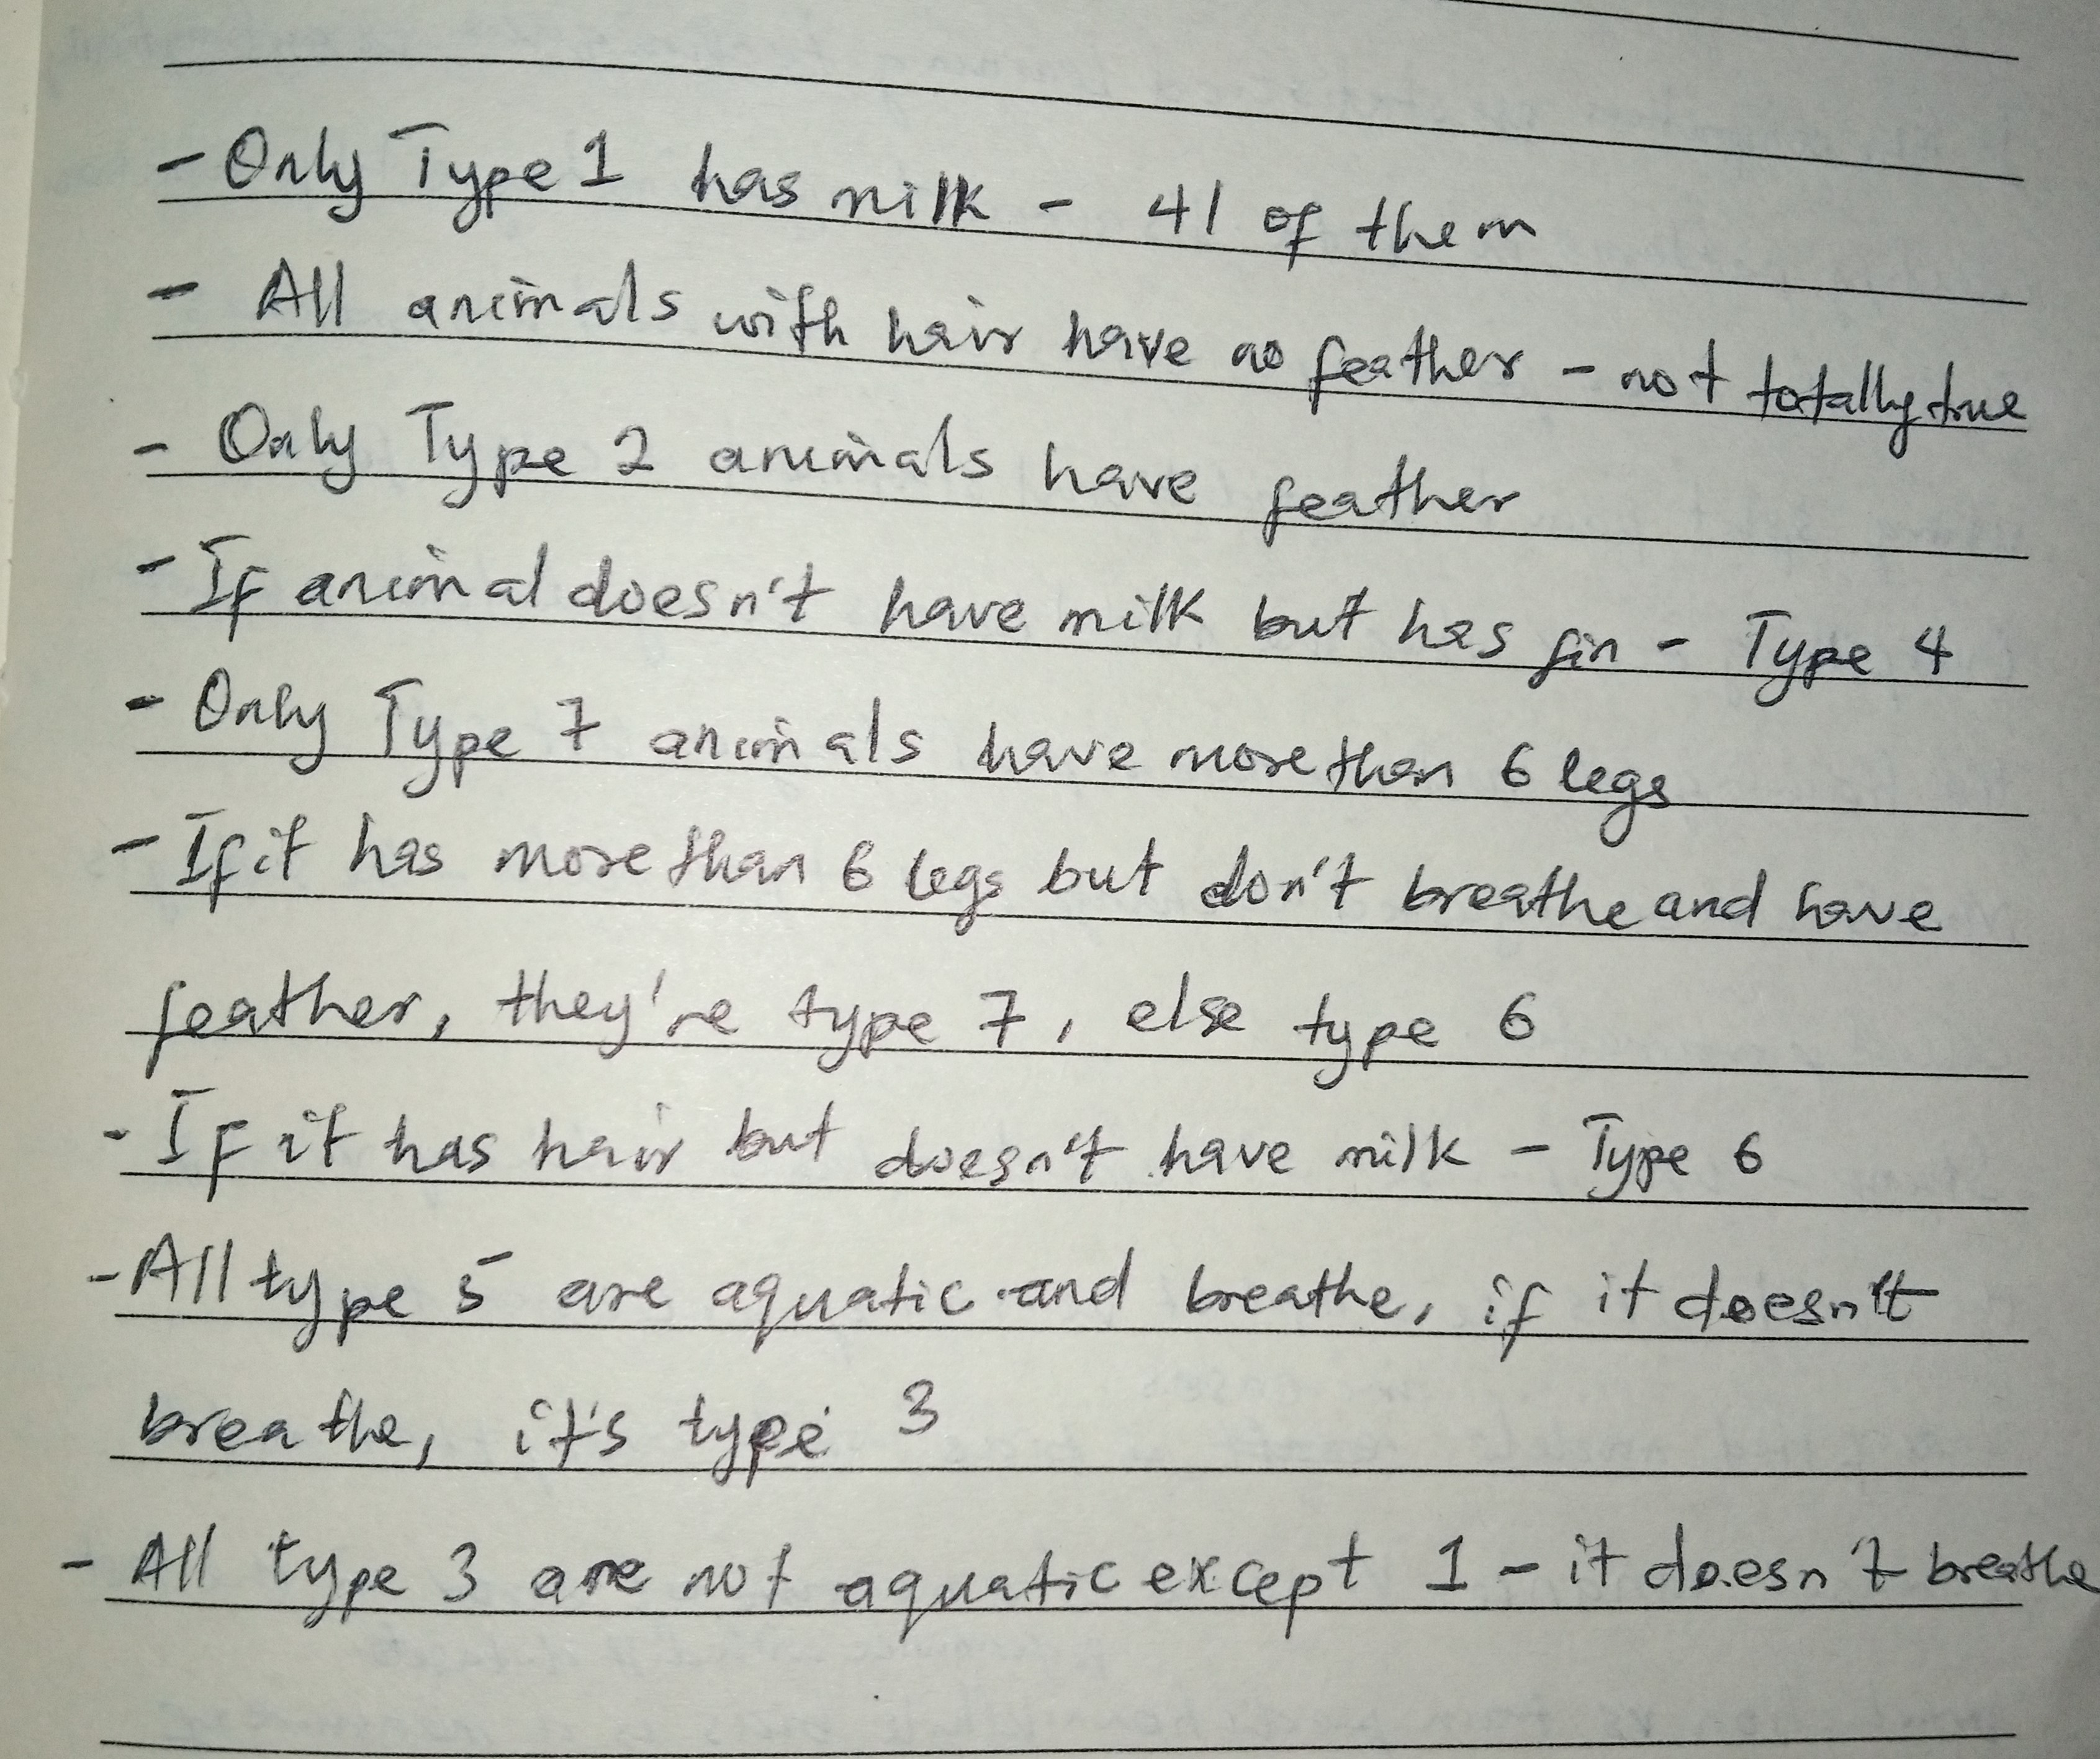

# Feature Extraction

We'll now split up the data into features and labels. We will not do any special pre-processing to generate features, but you are of course welcome to experiment with engineering new features if you have an intuition for how it will improve your model performance.  

In [ ]:
features = zoo.loc[:, 'hair':'catsize'] # Omit animal name
labels = zoo.loc[:, 'type']
# We then convert the feature and labels dataframes to 
# numpy ndarrays, which can interface with the scikit-learn models
X = features.to_numpy()
y = labels.to_numpy()

In [ ]:
# To help familiarize yourself with these matrices, 
# have a look at their 'shapes' and understand why they are so.
print('X shape', X.shape)
print('y shape', y.shape)

X shape (101, 16)
y shape (101,)


In [ ]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

# ML Algorithm and Model

The model you will use to create classifications is called a “Decision Tree”. You have likely seen these charted as thought diagrams, and are a popular tool among biologists for species identification. It’s also a powerful machine learning model that’s relatively intuitive which we can use to practice classification in the ML pipeline. 

The decision tree model is described in the assigned pre-reading *A visual introduction to machine learning* (parts [I](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) and [II](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)) by stephanie yee and Tony Chu, 2018. 

We also give one example of pseudo-code for training a simple version tree (with binary splits) in: 

[A Course in Machine Learning, ch 1., Decision Trees](http://ciml.info/dl/v0_99/ciml-v0_99-ch01.pdf), by Hal Daumé III, 2015

We encourage you to read it carefully and work with peers to understand it’s behavior. Depending on your stretch task submission, it may be to your advantage to explain how the model learns. 

Additional resources: To use the scikit-learn decision tree algorithm, have a look at their [documentation](https://scikit-learn.org/stable/modules/tree.html). A more advanced ensemble of decision trees is called a “random forest”, while we do not cover it in class you are welcome to learn more about this approach. You can find one useful resource visualizing decision trees and generating random forests [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html). 

In [ ]:
#Initializing the decision tree classifier
from __future__ import print_function
from sklearn import tree
clf = tree.DecisionTreeClassifier()

## Quality Metric and Model Tuning

First, let's begin by splitting our data into training and test sets. You can do so using scikit-learn's [`test_train_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. When setting its parameters, be mindful record your decisions. (You can also create a validation set by using `test_train_split` a second time.)

In [ ]:
# Spliting the data into train/test sets with 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### Train your model

Try training your model decision tree model below on the training set.

In [ ]:
#training the model on the train set
clf = clf.fit(X_train, y_train)

## Evaluate your model

Start by testing out your model's test set accuracy using the DecisionTree's `score` function.

In [ ]:
#Using the model to make predictions on the test set
pred = clf.predict(X_test)

#Printing the models score on both the train and test data
print("Training:"+str(clf.score(X_train,y_train)))
print("Test:"+str(clf.score(X_test,y_test)))

#The score from the score above was too high so I decided to check the accuracy again
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Training:1.0
Test:1.0
Accuracy: 1.0


Given the result above, I wasn't sure if I overfitted. Having a score of 1 on train set is unrealistic and a sign of overfitting. Is it still considered overfitting if it has a score of 1 on test set too? 

This is my first time experiencing this, which is why i decided to confirm the score with metrics accuracy score

## Visualizing your model

A good first way to investigate your model is by visualizing it! We can do so using code similar to that provided by scikit-learn on the documentation page for the DecisionTreeClassifier model.

You may also find their "[Understanding the decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py)" useful for understanding your model's behavior.

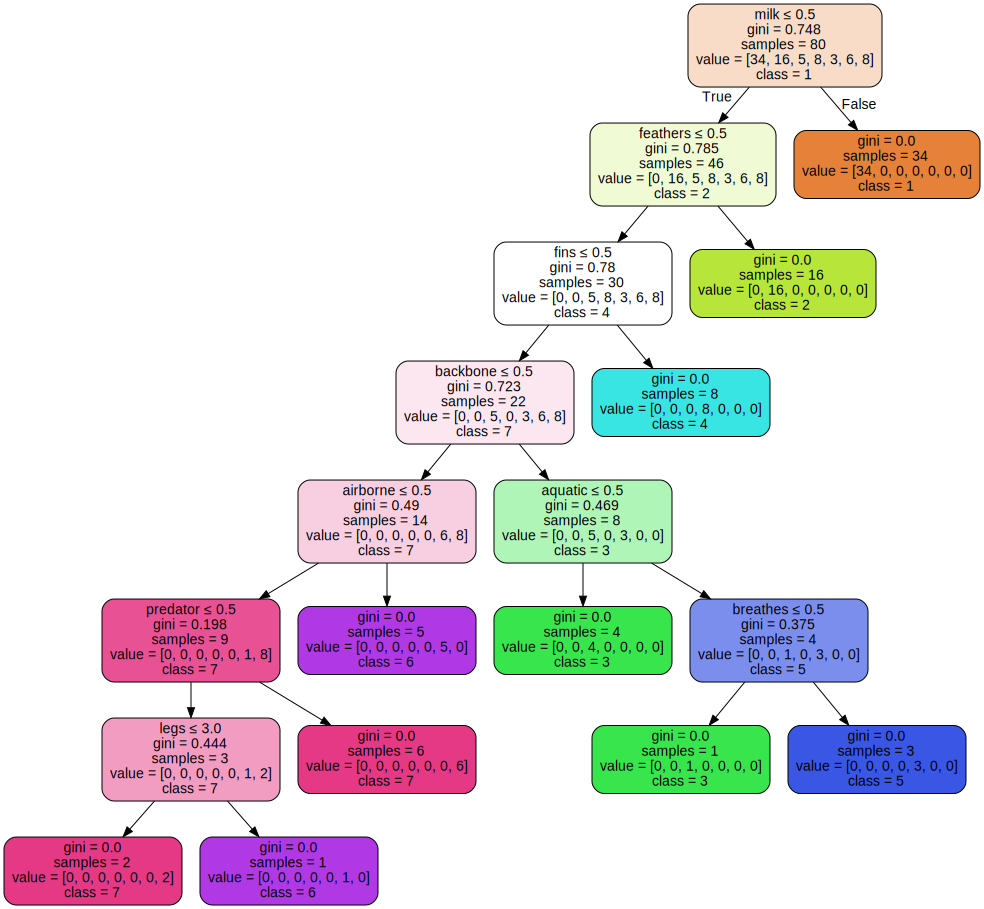

In [ ]:
from sklearn import tree
import graphviz

# clf = # YOUR DECISON TREE CLASSIFIER HERE
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=features.columns,  
                      class_names=sorted(list(map(str, labels.unique()))),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Tuning your model

Hyperparameters like max depth can drastically affect your model's performance. Use k-fold cross validation to determine a good `max_depth` for your decision tree. Plot the cross validation score for each `max_depth` setting. Be sure to record how many folds you selected.

You can learn how to do k-fold cross validation with scikit-learn from the [documentation](https://scikit-learn.org/stable/modules/cross_validation.html).

In [ ]:
# Trying a 3 k-fold validation on the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=3)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.95 (+/- 0.06)


To use the k-fold cross validation to determine a good max_depth for the decision tree, I created a new instance of the tree and iteratively changed the max_depth value from 2 to 10.

In [ ]:
#Creating a new instance of the tree
Tree = tree.DecisionTreeClassifier(max_depth=10)
#Trainig the model
Tree = Tree.fit(X_train, y_train)
#Testing it on the test set
Tree.predict(X_test)
#checking the performance score
print("Training:"+str(Tree.score(X_train,y_train)))
print("Test:"+str(Tree.score(X_test,y_test)))

#verifying the score with accuracy metrics score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Training:1.0
Test:1.0
Accuracy: 1.0


In [ ]:
# YOUR CROSS VALIDATION CODE HERE
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Tree, X, y, cv=3)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

CV Accuracy: 0.94 (+/- 0.05)



The accuracy score of tree with respect to the set max depth
*   A max depth of 2 had CV Accuracy of : 0.73 
*   A max depth of 3 had CV Accuracy of : 0.81 
*   A max depth of 4 had CV Accuracy of : 0.87
*   A max depth of 5 had CV Accuracy of : 0.92
*   A max depth of 6 had CV Accuracy of : 0.94
*   A max depth of 7 had CV Accuracy of : 0.95
*   A max depth of 8 had CV Accuracy of : 0.94 (+/- 0.06)
*   A max depth of 9 had CV Accuracy of : 0.93 (+/- 0.06)
*   A max depth of 10 had CV Accuracy of : 0.94 (+/- 0.06)

Since, the model had the highest accuracy at max depth 7, is it best to set the max depth to 7 or are there other hyperparameters I should have considered but didn't?



Next steps -- now that you've completed the ML pipeline for a classifier model, it's time for you to complete the stretch task. The stretch tasks are explained in more detail in the project handout -- a good place to start is taking some time to reflect on your skills through the skills essay, and then selecting the stretch task you think will best help you develop those skills. This will likely lead you to continuing to investigate concepts related to the code above, implementing or experimenting with a new approach, and so forth. In this sense, you can view the above as a helpful scaffold for what you will discuss in the video. We also encourage you as using the above as a framework for applying the ML pipeline to create a classifier on the ANU coffee dataset. We plan to release it by 5pm on Friday, August 27.



Since scikit learn [decision tree](https://scikit-learn.org/stable/modules/tree.html) uses the CART algorithm and records a high accuracy, I am going to implement the ID3 algorithm and compare their performances.

### ID3 Description exerpt from [wiki page](https://https://en.wikipedia.org/wiki/ID3_algorithm)
The ID3 ((Iterative Dichotomiser 3)) algorithm begins with the original dataset S as the root node. On each iteration of the algorithm, it iterates through every unused attribute of the set S and calculates the entropy H(S) & the information gain IG(S) of that attribute. It then selects the attribute which has the smallest entropy (or largest information gain) value. The set S is then split or partitioned by the selected attribute to produce subsets of the data. The algorithm continues to recurse on each subset, considering only attributes never selected before.

ID3 Pseudocode from Wiki page



```

ID3 (Examples, Target_Attribute, Attributes)
    Create a root node for the tree
    If all entries have the same label, Return the single-node tree Root, with the label 
    If number of predicting attributes is empty, then Return the single node tree Root,
    with label = most common value of the target attribute in the examples.
    Otherwise Begin
        A ← The Attribute that best classifies examples.
        Decision Tree attribute for Root = A.
        For each possible value, vi, of A,
            Add a new tree branch below Root, corresponding to the test A = vi.
            Let Examples(vi) be the subset of examples that have the value vi for A
            If Examples(vi) is empty
                Then below this new branch add a leaf node with label = most common target value in the examples
            Else below this new branch add the subtree ID3 (Examples(vi), Target_Attribute, Attributes – {A})
    End
    Return Root


ID3 Base Criteria

1. Every element in the subset belongs to the same class.
2. There are no more attributes to be selected, but the examples still do not belong to the same class. 
3. There are no examples in the subset - that is the subset is empty. 
```



### The ID3 metrics


*   Entropy
*   Information gain




\begin{equation*}
Entropy, H(S)  = \sum_{j} -P_j log_2P_j
\end{equation*}

In [ ]:
def entropy(col):
    """
    Calculate the entropy of a dataset. 
    It takes as parameter the column name.
    It returns the measures of impurity of the given column, the label column.
    The return type is double
    """

    #Get the counts of unique values in the column
    val_cnt = col.value_counts().sort_index()

    #Get the valuesin the column and their respective counts
    vals = val_cnt.index.tolist()
    counts = val_cnt.values.tolist()

    #Calculate column entropy
    entropy = 0
    for i in range(len(vals)):
        prob = counts[i]/np.sum(counts)
        ln = np.log2(prob)
        entropy = entropy - (prob * ln)
    return entropy

In [ ]:
#testing on the type column
entropy(labels)

2.390559682294039

\begin{equation*}
Information\ Gain,\ IG(S,A)  = H(S) -\sum_{j} P_j H_j
\end{equation*}

In [ ]:
def Gain(data, var):
    """
    Calculates the information gain of a give dataset. 
    It takes as parameters the dataset whose information gain will be claculated,
    and the variable on which the information gain will be calculated.

    It returns the information gain and the return types is double
    """    
    #Calculate the entropy of the whole zoo dataset
    label = "type"
    data_entropy = entropy(data[label])
    
    ##Calculate the entropy of the dataset
    
    ##Get the values in the split variable and their respective counts  
    val_cnt = data[var].value_counts().sort_index()
    vals = val_cnt.index.tolist()
    counts = val_cnt.values.tolist()

    #Calculate the entropy of the sub dataset
    sub_entropy = 0
    for i in range(len(vals)):
        sub_data = data.loc[zoo[var] == vals[i]]
        sub_label = sub_data[label]
        prob = counts[i]/np.sum(counts)
        sub_entropy = sub_entropy + (prob * entropy(sub_label))

    #Calculate the information gain on the variable
    Information_Gain = data_entropy - sub_entropy
    return Information_Gain
       

In [ ]:
#testing on both milk and legs columns
print(Gain(zoo, 'milk'))
print(Gain(zoo, 'legs'))

0.9743197211096903
1.3630469031539394


Honestly, since milk has the highest information gain in my manual approach and the decision tree classifier, I expected it to have a higher information gain than legs. It surprisingly didn't. I thought there was something wrong with my implementation of gini index but i couldn't find a way to improve it 

### The ID3 Algorithm Implementation 

In [ ]:
def ID3(sub_data,data, vars, parent_label = None):
    """
    This function implements the ID3 Algorithm.
    It takes the data subset, the whole data, the column names, and the label of the parent node as paramters.
    It recursively calls itself on the dataset and data subset until every element in the subset belongs to the same class.
    It returns the decision tree.
    """ 

    ##Implementing the base case - stops the recursion on a subset
    
    label="type"
    #Get the unique values of a variable
    unique_label = sub_data[label].unique()
    
    ##Check if there are no examples in the subset
    #If the dataset is empty, it returns the modal class in the whole dataset
    if len(sub_data)==0:
        return data[label].mode()

    ##Check if every element in the subset belongs to the same class.
    #If all entries have the same label, it returns the label
    elif len(unique_label) == 1:
        return unique_label[0]
    
    ##Check if there are no more attributes to be selected, even if the instances still do not belong to the same class. 
    #If there are no more attributes to be selected, it returns the modal class in the parent node    
    elif len(vars) ==0:
        return parent_label
    
    ##Implementing the base case - generates the decision tree
    else:
        #Set most common value of the target attribute in the sub dataset as the default label for the node        
        parent_label = sub_data[label].mode()[0]
        
        ##Determine the variable which best classifies the sub dataset
        ##Search for the variable with the highest information gain and picks it out of the list of variables.

        #Calculate the information gain for all the variables in the dataset
        item_values = [Gain(sub_data,var) for var in vars] 
        max_index = np.argmax(item_values)
        split_var = vars[max_index]
        
        #Remove the selected variable from the variables list#
        vars = vars.delete(max_index)

        #Create the decision tree with the selected variable as the root
        tree = {split_var:{}}       
        
        
        ##Create a branch for each possible label of the root node
        
        for value in sub_data[split_var].unique():
            #Create sub datasets for each possible labels
            sub_data_split = sub_data.loc[sub_data[split_var] == value]
            
            #Recursively call the ID3 algorithm for the sub datasets with updated parameters
            subtree = ID3(sub_data_split,zoo,vars,parent_label)
            
            #Add the sub tree to the tree dictionary
            tree[split_var][value] = subtree
            
        return(tree)

After implementing the ID3 decision tree algorithm following the instructions in the wiki page, I couldn't get a clear explaination of how to write the function that make predictions on data, so I used the code snippet from [here](https://www.python-course.eu/Decision_Trees.php).

Even though I repeatedly read the explaination of the implementation of the below codes, I still don't reaally understand what they did.


In [ ]:
#I couldn't get an explaination of how to write the predict or  function, so I used the code snippet from https://www.python-course.eu/Decision_Trees.php
def predict(query,tree,default = 1):
    """
    Prediction of a new/unseen query instance. This takes two parameters:
    1. The query instance as a dictionary of the shape {"feature_name":feature_value,...}

    2. The tree 


    This is also done recursively.

    SUMMARIZED: If we have a query instance consisting of values for features, we take this features and check if the 
    name of the root node is equal to one of the query features.
    If this is true, we run down the root node outgoing branch whose value equals the value of query feature == the root node.
    If we find at the end of this branch a leaf node (not a dict object) we return this value (this is our prediction).
    If we instead find another node (== sub_tree == dict objct) we search in our query for the feature which equals the value 
    of that node. Next we look up the value of our query feature and run down the branch whose value is equal to the 
    query[key] == query feature value. And as you can see this is exactly the recursion we talked about
    with the important fact that for each node we run down the tree, we check only the nodes and branches which are 
    below this node and do not run the whole tree beginning at the root node 
    --> This is why we re-call the classification function with 'result'
    """
    

    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
                
            result = tree[key][query[key]]
            
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result


I'll now drop the animal name column since it won't help improve the model performance in any way. I dropped the animal name column because it has unique names for each row, having it in the tables wouldn't help the machine learning process since its values are string type, and it is not suitable for machine learning processing.

In [ ]:
#Delete the zoo column
zoo.drop('animal name',axis=1, inplace=True)

I will now test the accuracy of the model by using it to predict on a test set. To do this, I will first split the data into train/test sets with 80:20 ratio

In [ ]:
def train_test_split(dataset):
    """
    The function divides the given dataset into a training and a testing set. 
    It divides them on the ration of 80:20.
    It returns the train and test sets
    """

    #create train set
    training_data = dataset.iloc[:80].reset_index(drop=True)
    #create test set
    testing_data = dataset.iloc[80:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(zoo)[0]
testing_data = train_test_split(zoo)[1] 

In [ ]:
def test(data,tree):
    #Create new query instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    #Calculate the prediction accuracy
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["type"])/len(data)))

Model Testing and Validation

In [ ]:
from pprint import pprint
#Train the tree
tree = ID3(training_data,training_data,training_data.columns[:-1])

#Print the generated tree
pprint(tree)

#test the model accuracy
test(testing_data,tree)

{'legs': {0: {'fins': {0: {'toothed': {0: 7, 1: 3}},
                       1: {'eggs': {0: 1, 1: 4}}}},
          2: {'hair': {0: 2, 1: 1}},
          4: {'hair': {0: {'toothed': {0: 7, 1: 5}}, 1: 1}},
          6: {'aquatic': {0: 6, 1: 7}},
          8: 7}}
The prediction accuracy is:  0.8571428571428571


The model's accuracy is low unlike that of scikitlearn, which could have been due to how I implimented the entropy, information gain, the train/set split. Will it have performed better if I randomized the split? Are there other hyperparameters I should have considered but I didn't?

I still have a lot of unanswered questions regarding this task that I hope to find answers to soon.